# 4.2: Clinic Well-being

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data loading and processing

In [27]:
df = pd.read_csv("wellbeing_dataset.csv ")

In [28]:
df.isnull().values.any()

False

In [29]:
df.columns

Index(['DAILY_STRESS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'BMI_RANGE',
       'TODO_COMPLETED', 'DAILY_STEPS', 'SLEEP_HOURS', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_HOBBY', 'WEEKLY_MEDITATION', 'AGE',
       'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [30]:
df.head()

,DAILY_STRESS,SOCIAL_NETWORK,ACHIEVEMENT,BMI_RANGE,TODO_COMPLETED,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_HOBBY,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,2,5,2,1,6,5,7,1,4,0,5,36 to 50,Female,609.5
1,3,10,5,2,5,5,8,2,3,2,6,36 to 50,Female,655.6
2,3,10,3,2,2,4,8,2,4,8,3,36 to 50,Female,631.6
3,3,7,2,2,3,5,5,1,5,2,0,51 or more,Female,622.7
4,1,4,2,2,5,5,7,2,8,1,5,51 or more,Female,663.9


In [31]:
df.describe()

,SOCIAL_NETWORK,ACHIEVEMENT,BMI_RANGE,TODO_COMPLETED,DAILY_STEPS,SLEEP_HOURS,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_HOBBY,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,6.474267,4.000751,1.410656,5.745993,5.703606,7.042888,1.728963,5.711558,3.326572,6.233346,666.751503
std,3.086672,2.755837,0.491968,2.624097,2.891013,1.199044,0.444509,3.089630,2.729293,3.016571,45.019868
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,4.000000,2.000000,1.000000,4.000000,3.000000,6.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,6.000000,3.000000,1.000000,6.000000,5.000000,7.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,10.000000,6.000000,2.000000,8.000000,8.000000,8.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


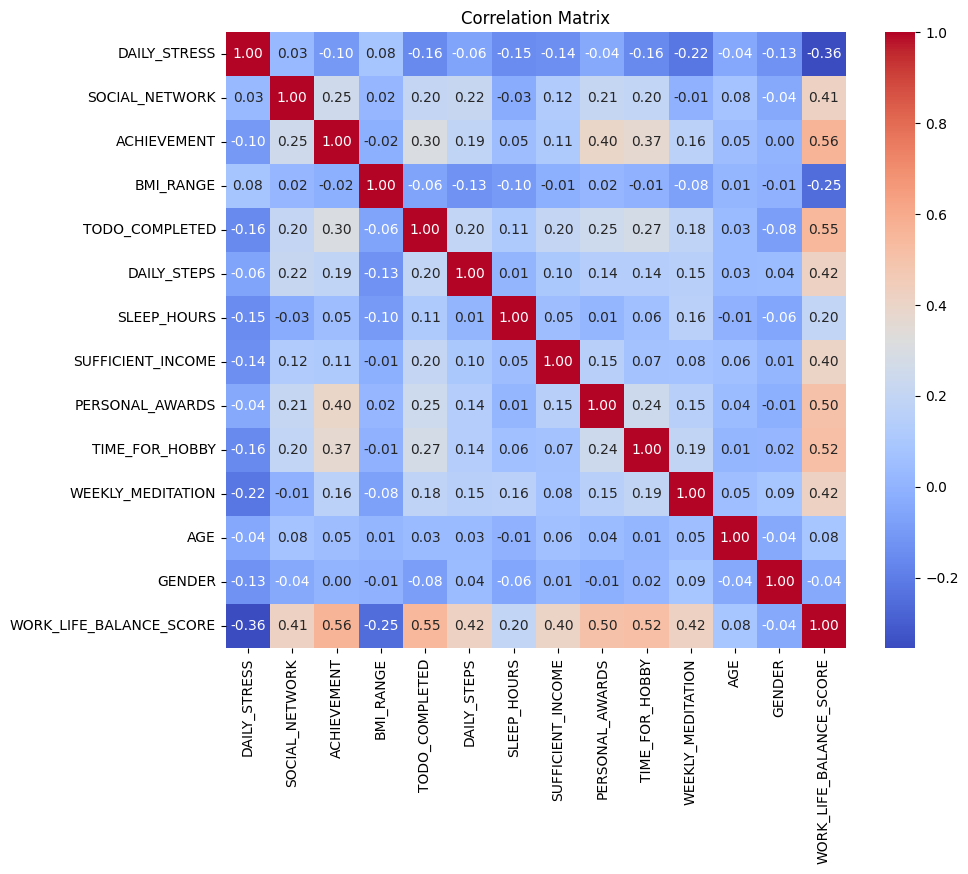

In [32]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Read the data from the CSV file
df1 = pd.read_csv("wellbeing_dataset.csv ")

# Perform label encoding for categorical features
categorical_features = ["DAILY_STRESS", "AGE","GENDER"]
for feature in categorical_features:
    le = LabelEncoder()
    df1[feature] = le.fit_transform(df1[feature])
#print(df1.info())
# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



# 4.3: FAU Predictive Model

In [33]:
x = df1.drop(['WORK_LIFE_BALANCE_SCORE'], axis=1)
y = df1['WORK_LIFE_BALANCE_SCORE']

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [35]:
from sklearn.linear_model import LinearRegression 
ml = LinearRegression()
ml.fit(x_train, y_train)
y_pred = ml.predict(x_test)

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (Accuracy):", r2)

# Display the coefficients and intercept (model summary)
print("Model Coefficients:")
coefficients = pd.DataFrame({"Feature": x.columns, "Coefficient": ml.coef_})
print(coefficients)

print("Intercept:", ml.intercept_)

Mean Squared Error (MSE): 298.4344722051001
R-squared (Accuracy): 0.8496931861488893
Model Coefficients:
              Feature  Coefficient
0        DAILY_STRESS    -4.626802
1      SOCIAL_NETWORK     2.703296
2         ACHIEVEMENT     3.151626
3           BMI_RANGE   -16.789427
4      TODO_COMPLETED     3.095438
5         DAILY_STEPS     2.654485
6         SLEEP_HOURS     2.648247
7   SUFFICIENT_INCOME    22.194738
8     PERSONAL_AWARDS     2.976222
9      TIME_FOR_HOBBY     3.384779
10  WEEKLY_MEDITATION     2.689147
11                AGE     0.416345
12             GENDER    -5.651368
Intercept: 543.6496977466476
